In [196]:
import pandas as pd 
import matplotlib.pyplot as plt

path = "advertising.csv"
df = pd.read_csv(path, sep=',')

df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [197]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


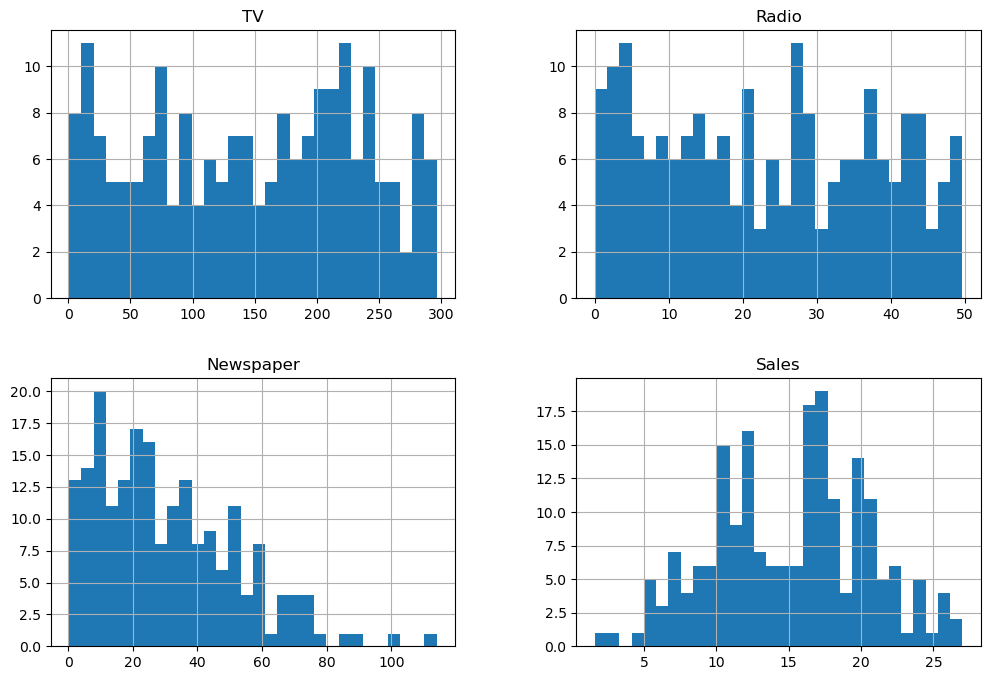

In [198]:
df.hist(bins=30, figsize=(12,8))
plt.show()

Zaleznosci poszczegolnych zmiennych i sprzedazy

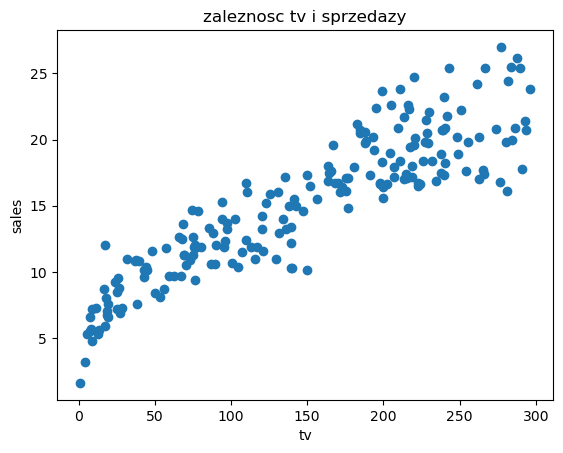

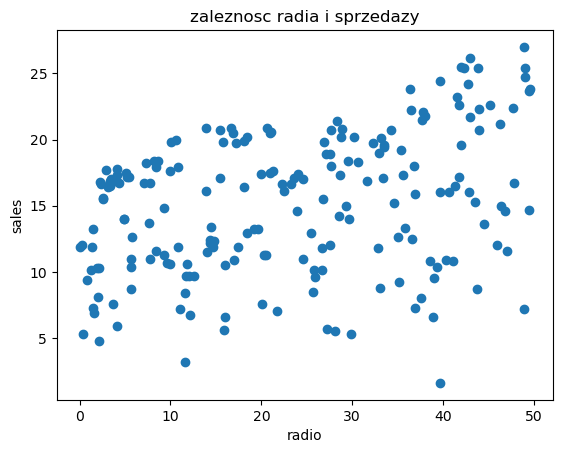

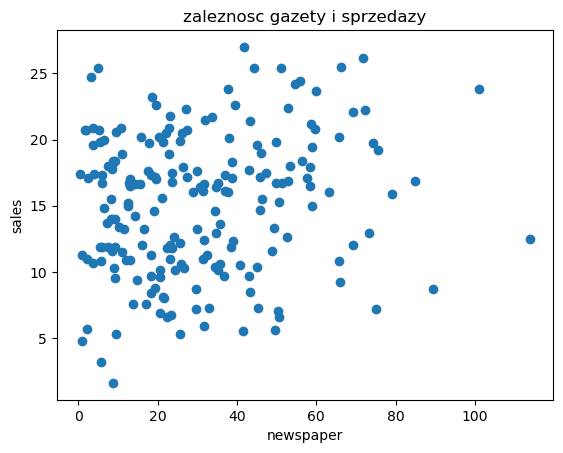

In [199]:
def correlation(input, output, input_name, output_name, title):
    plt.figure()
    plt.scatter(input, output)
    plt.xlabel(input_name)
    plt.ylabel(output_name)
    plt.title(title)

correlation(df['TV'], df['Sales'], 'tv', 'sales', 'zaleznosc tv i sprzedazy')
correlation(df['Radio'], df['Sales'], 'radio', 'sales', 'zaleznosc radia i sprzedazy')
correlation(df['Newspaper'], df['Sales'], 'newspaper', 'sales', 'zaleznosc gazety i sprzedazy')

In [200]:
print(df.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


TV ma mocną korelację z sales, radio mniejszą, a newspaper bardzo słabą. 

Preprocessing:

In [201]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(x_train, y_train):
    scal = StandardScaler()
    x_proc = scal.fit_transform(x_train)

    return x_proc, y_train, scal 

Sprawdzanie:

In [202]:
from sklearn.metrics import (
    mean_squared_error, r2_score
)
def check(out_test, out_pred):
    mse = mean_squared_error(out_test, out_pred)
    r2 = r2_score(out_test, out_pred)

    tab = pd.DataFrame([{"MSE": mse, "R2": r2}], index=["wyniki"])
    return tab


Podział danych:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df[['TV', 'Radio', 'Newspaper']] 
Y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=38
)

Baseline:

In [204]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='median')
dummy.fit(x_train, y_train)

y_pred = dummy.predict(x_test)

print(check(y_test, y_pred))

            MSE        R2
wyniki  20.1325 -0.068362


Preprocessed baseline:

In [205]:
x_train_proc, y_train_proc, pre = preprocess_data(x_train, y_train) 

dummy = DummyRegressor(strategy='mean')
dummy.fit(x_train_proc, y_train_proc)

y_pred = dummy.predict(x_test)

print(check(y_test, y_pred))

              MSE        R2
wyniki  18.954416 -0.005845


Knn bez preprocessingu:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(check(y_test, y_pred))

             MSE        R2
wyniki  2.391025  0.873117


Knn z preprocessingiem:

In [207]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(x_train_proc, y_train_proc)
x_test_proc = pre.transform(x_test)
y_pred = knn.predict(x_test_proc)

print(check(y_test, y_pred))

             MSE        R2
wyniki  1.791833  0.904914
